In [32]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
import math
from math import log
import numpy as np 
from numpy.linalg import norm 
import matplotlib 
import matplotlib.pyplot as plt



from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import itertools
from itertools import product

import random

Generate a Cantor Set, defined as for set $A_i$, $x=\sum\limits_{k=1}^\infty{a_\text{k}*(2^n)^\text{-k}}$  where $a_\text{k}\in \{ 0,2^\text{i-1} \}$

In [33]:
x=[]
kgap=4  # determines how many time the iteration will go, will generate 2^kgap numbers of points
def xinAi(k,coor,power,dimension):  # for the case x in Ai, dimension is the dim of the cantor set, i=dimension, power starts from 1
    for an in [0, 2**(dimension-1)]:
        coor = coor + an*((2**dimension)**(-power))

        if power < k:
            xinAi(k, coor, power + 1, dimension)

        else :
            x.append(coor)

xinAi(kgap,0,1,2)


print(x)

[0.0, 0.0078125, 0.03125, 0.0390625, 0.125, 0.1328125, 0.15625, 0.1640625, 0.5, 0.5078125, 0.53125, 0.5390625, 0.625, 0.6328125, 0.65625, 0.6640625]


Several possible learning tasks

In [34]:
def Distencefunction(HighDimVar):  
  HighDimVar=np.array(HighDimVar)
  sum=0
  #i,j = product
  #return math.sqrt(i*i+j*j)
  for i in range(len(HighDimVar)):
    sum = sum + HighDimVar[i]**2
  return math.sqrt(sum)


def SqrtAllComp(HighDimVar):    
  HighDimVar=np.array(HighDimVar)
  product=1

  for i in range(len(HighDimVar)):
    product=product * HighDimVar[i]
  
  return math.sqrt(product)

def IdentitySum(HighDimVar):
  HighDimVar = np.array(HighDimVar)
  sum = 0
  for i in range(len(HighDimVar)):
      sum = sum + HighDimVar[i]
  return sum

n Cantor sets (named as $A_1, A_2, A_3, A_4, A_5, ... A_n$ ) on [0,1] can be constructed so that their Cartesian product is reducible to a 1 dimensional set if $A_1$ only contains numbers with the digits 0 or 1, $A_2$ only contains numbers with the digits 0 or 2, $A_3$ only contains numbers with the digits 0 or 4,..... $A_n$ only contains numbers with the digits 0 or $2^\text{n-1}$ in base $2^n$

In [44]:
oneDimlist=[]

HighDimList=[]

outputlist=[]

x=[]

CantorList=[]

def HighDimCantorSet(CantorDimension):
  for i in range(2,CantorDimension+2):
    
    xinAi(kgap,0,1,i)
    xcopy=x.copy()
    #print(x)
    CantorList.append(xcopy)

    x.clear()
    

HighDimCantorSet(4)

print(CantorList)


CantorList=[]
def HighDim(NumofCarProdut,function):  #NumofCarProdut, it makes sense for training purpose for a value larger than 2

  #CantorList.clear()

  #CantorListCopy=CantorList.copy()
  HighDimCantorSet(NumofCarProdut)
  CarProdut=list(itertools.product(*CantorList))

  #CantorList.clear()
  
  for i in range(len(CarProdut)):    # HighDimList list of high dim points on the cantor set x1,x2,x3,....xn in R^n
      HighDimList.append(CarProdut[i])
      #print(CarProdut)


  for i in range(len(CarProdut)):    # sum of each point's coordinate and return a one dim list
        #print(sum(CarProdut[i]))
        oneDimlist.append(sum(CarProdut[i]))
  
  for i in range(len(HighDimList)):   # the function which input is each point in the HighDimlist, the function we will test is identity sum, distance and sqrt
      outputlist.append(function(HighDimList[i]))

HighDim(3,IdentitySum) #two layer sin(a/100)/100 sin(a/1)/100

#print(HighDimList)

[[0.0, 0.0078125, 0.03125, 0.0390625, 0.125, 0.1328125, 0.15625, 0.1640625, 0.5, 0.5078125, 0.53125, 0.5390625, 0.625, 0.6328125, 0.65625, 0.6640625], [0.0, 0.0009765625, 0.0078125, 0.0087890625, 0.0625, 0.0634765625, 0.0703125, 0.0712890625, 0.5, 0.5009765625, 0.5078125, 0.5087890625, 0.5625, 0.5634765625, 0.5703125, 0.5712890625], [0.0, 0.0001220703125, 0.001953125, 0.0020751953125, 0.03125, 0.0313720703125, 0.033203125, 0.0333251953125, 0.5, 0.5001220703125, 0.501953125, 0.5020751953125, 0.53125, 0.5313720703125, 0.533203125, 0.5333251953125], [0.0, 1.52587890625e-05, 0.00048828125, 0.0005035400390625, 0.015625, 0.0156402587890625, 0.01611328125, 0.0161285400390625, 0.5, 0.5000152587890625, 0.50048828125, 0.5005035400390625, 0.515625, 0.5156402587890625, 0.51611328125, 0.5161285400390625]]


# Higher Dim Case(>=2)





 ##  x,y to mutivariate function

In [36]:
oneDimlist=[]

HighDimList=[]

outputlist=[]

CantorList=[]



def increaseDiscreteDimMV(finalDim):  #it will generate a series of Cantor sets with increasing dimesntionality and the corresponding learning tasks
  for i in range(2,finalDim+1):   #finalDim corresponds to the dimention of the last high dim Cantor set in the series of Cantor sets

    oneDimlist.clear()
    HighDimList.clear()
    outputlist.clear()
    
    CantorList.clear()

    HighDim(i,SqrtAllComp)   

    print(HighDimList)
    #print(CarProdut)

    #HighDim(xaxis,i,IdentitySum)
    
    #HighDim(xaxis,i,SqrtAllComp)
   
    z1 = np.array(HighDimList)
    k1 = np.array(outputlist)
  
    #print(HighDimListCopy)

    z1_train, z1_test, k1_train, k1_test = train_test_split(z1,k1, test_size=0.2, shuffle=True)

    backend.clear_session()
    modelh = Sequential()
    modelh.add(Dense(100, input_dim=i, activation='relu')) # Hidden 1  dim increases in each loop no need for too many units  3000
    modelh.add(Dense(50, activation='relu')) # Hidden 2
    modelh.add(Dense(1)) # Output
    modelh.compile(loss='mean_squared_error', optimizer='adam')
    modelh.fit(z1_train,k1_train,verbose=2,epochs=5)

    pred2 = modelh.predict(z1_test)
    score2 = np.sqrt(metrics.mean_squared_error(pred2,k1_test))
    print("Dimension: ", i )
    print("**********", score2)

 

increaseDiscreteDimMV(2)   

[(0.0, 0.0), (0.0, 0.0009765625), (0.0, 0.0078125), (0.0, 0.0087890625), (0.0, 0.0625), (0.0, 0.0634765625), (0.0, 0.0703125), (0.0, 0.0712890625), (0.0, 0.5), (0.0, 0.5009765625), (0.0, 0.5078125), (0.0, 0.5087890625), (0.0, 0.5625), (0.0, 0.5634765625), (0.0, 0.5703125), (0.0, 0.5712890625), (0.0078125, 0.0), (0.0078125, 0.0009765625), (0.0078125, 0.0078125), (0.0078125, 0.0087890625), (0.0078125, 0.0625), (0.0078125, 0.0634765625), (0.0078125, 0.0703125), (0.0078125, 0.0712890625), (0.0078125, 0.5), (0.0078125, 0.5009765625), (0.0078125, 0.5078125), (0.0078125, 0.5087890625), (0.0078125, 0.5625), (0.0078125, 0.5634765625), (0.0078125, 0.5703125), (0.0078125, 0.5712890625), (0.03125, 0.0), (0.03125, 0.0009765625), (0.03125, 0.0078125), (0.03125, 0.0087890625), (0.03125, 0.0625), (0.03125, 0.0634765625), (0.03125, 0.0703125), (0.03125, 0.0712890625), (0.03125, 0.5), (0.03125, 0.5009765625), (0.03125, 0.5078125), (0.03125, 0.5087890625), (0.03125, 0.5625), (0.03125, 0.5634765625), (0.0

## Decomposition x+y to (x,y)

In [37]:
oneDimlist=[]

HighDimList=[]

outputlist=[]

CantorList=[]

def increaseDiscreteDimDECOMP(finalDim):   
  for i in range(2,finalDim+1):

    
    oneDimlist.clear()
    HighDimList.clear()
    outputlist.clear()
    
    CantorList.clear()

    HighDim(i,IdentitySum)

    #print(HighDimList)
    #print(CarProdut)

    #Distencefunction
    #HighDim(xaxis,i,IdentitySum)
    
    #HighDim(xaxis,i,SqrtAllComp)
   
    z1 = np.array(oneDimlist)
    k1 = np.array(HighDimList)
    
    #print(HighDimListCopy)
 
    z1_train, z1_test, k1_train, k1_test = train_test_split(z1,k1, test_size=0.2, shuffle=True)

    backend.clear_session()
    modelh = Sequential()
    modelh.add(Dense(100, input_dim=1, activation='relu')) # Hidden 1  dim increases in each loop no need for too many units  3000
    modelh.add(Dense(50, activation='relu')) # Hidden 2
    modelh.add(Dense(i)) # Output dimension 
    modelh.compile(loss='mean_squared_error', optimizer='adam')
    modelh.fit(z1_train,k1_train,verbose=2,epochs=5)

    pred2 = modelh.predict(z1_test)
    score2 = np.sqrt(metrics.mean_squared_error(pred2,k1_test))
    print("**********", score2)

 

increaseDiscreteDimDECOMP(3)   

Epoch 1/5
7/7 - 0s - loss: 0.1504 - 390ms/epoch - 56ms/step
Epoch 2/5
7/7 - 0s - loss: 0.0893 - 17ms/epoch - 2ms/step
Epoch 3/5
7/7 - 0s - loss: 0.0530 - 15ms/epoch - 2ms/step
Epoch 4/5
7/7 - 0s - loss: 0.0378 - 17ms/epoch - 2ms/step
Epoch 5/5
7/7 - 0s - loss: 0.0365 - 15ms/epoch - 2ms/step
********** 0.17768469624561453
Epoch 1/5
103/103 - 1s - loss: 0.0532 - 508ms/epoch - 5ms/step
Epoch 2/5
103/103 - 0s - loss: 0.0431 - 148ms/epoch - 1ms/step
Epoch 3/5
103/103 - 0s - loss: 0.0429 - 156ms/epoch - 2ms/step
Epoch 4/5
103/103 - 0s - loss: 0.0430 - 158ms/epoch - 2ms/step
Epoch 5/5
103/103 - 0s - loss: 0.0429 - 155ms/epoch - 2ms/step
********** 0.20815332690173713


## Comparing with decomposition

In [38]:
oneDimlist=[]

HighDimList=[]

outputlist=[]

CantorList=[]

def increaseDiscreteDimIDDECOMP(finalDim):
  for i in range(2,finalDim+1):

    
    oneDimlist.clear()
    HighDimList.clear()
    outputlist.clear()
    
    CantorList.clear()

    HighDim(i,IdentitySum)


    #print(HighDimList)
    #print(CarProdut)

    #HighDim(xaxis,i,IdentitySum)
    
    #HighDim(xaxis,i,SqrtAllComp)
    
    z1 = np.array(HighDimList)
    k1 = np.array(outputlist)

    
    #print(HighDimListCopy)
  
    z1_train, z1_test, k1_train, k1_test = train_test_split(z1,k1, test_size=0.2, shuffle=True)

    backend.clear_session()
    modelh = Sequential()
    modelh.add(Dense(100, input_dim=i, activation='relu')) # Hidden 1  dim increases in each loop no need for too many units  3000
    modelh.add(Dense(50, activation='relu')) # Hidden 2
    modelh.add(Dense(1)) # Output
    modelh.compile(loss='mean_squared_error', optimizer='adam')
    modelh.fit(z1_train,k1_train,verbose=2,epochs=5)

    pred2 = modelh.predict(z1_test)
    score2 = np.sqrt(metrics.mean_squared_error(pred2,k1_test))
    print("**********", score2)

 

increaseDiscreteDimIDDECOMP(3)   

Epoch 1/5
7/7 - 0s - loss: 0.4193 - 362ms/epoch - 52ms/step
Epoch 2/5
7/7 - 0s - loss: 0.1742 - 15ms/epoch - 2ms/step
Epoch 3/5
7/7 - 0s - loss: 0.0506 - 16ms/epoch - 2ms/step
Epoch 4/5
7/7 - 0s - loss: 0.0214 - 16ms/epoch - 2ms/step
Epoch 5/5
7/7 - 0s - loss: 0.0242 - 15ms/epoch - 2ms/step
********** 0.14064577979216578
Epoch 1/5
103/103 - 0s - loss: 0.0977 - 486ms/epoch - 5ms/step
Epoch 2/5
103/103 - 0s - loss: 2.6269e-05 - 152ms/epoch - 1ms/step
Epoch 3/5
103/103 - 0s - loss: 9.8285e-06 - 139ms/epoch - 1ms/step
Epoch 4/5
103/103 - 0s - loss: 8.3076e-06 - 149ms/epoch - 1ms/step
Epoch 5/5
103/103 - 0s - loss: 6.9876e-06 - 139ms/epoch - 1ms/step
********** 0.0024908115129985754


## x+y to function

In [39]:
oneDimlist=[]

HighDimList=[]

outputlist=[]

CantorList=[]

#def Pickhundredpt(list): #list size >=1000
 # listcopy=random.sample(len(list), 2)
 # return listcopy

#test=[(1,2),(3,4),(3,7),(4,5)]

#print(Pickhundredpt(test))


def increaseDiscreteDimFRACTALMV(finalDim):
  for i in range(2,finalDim+1):

    
    oneDimlist.clear()
    HighDimList.clear()
    outputlist.clear()
    
    CantorList.clear()

    HighDim(i,SqrtAllComp)   


    #print(HighDimList)
    #print(CarProdut)

    #HighDim(xaxis,i,IdentitySum)
    
    #HighDim(xaxis,i,SqrtAllComp)

    print(HighDimList)
    print(oneDimlist)

    z1 = np.array(oneDimlist)
    k1 = np.array(outputlist)

    
    #print(HighDimListCopy)

    
      
    z1_train, z1_test, k1_train, k1_test = train_test_split(z1,k1, test_size=0.2, shuffle=True)

    backend.clear_session()
    modelh = Sequential()
    modelh.add(Dense(100, input_dim=1, activation='relu')) # Hidden 1  dim increases in each loop no need for too many units  3000
    modelh.add(Dense(50, activation='relu')) # Hidden 2
    modelh.add(Dense(1)) # Output
    modelh.compile(loss='mean_squared_error', optimizer='adam')
    modelh.fit(z1_train,k1_train,verbose=2,epochs=5)

    pred2 = modelh.predict(z1_test)
    score2 = np.sqrt(metrics.mean_squared_error(pred2,k1_test))
    print("Dimension: " ,i)
    print("**********", score2)

 

increaseDiscreteDimFRACTALMV(2)

[(0.0, 0.0), (0.0, 0.0009765625), (0.0, 0.0078125), (0.0, 0.0087890625), (0.0, 0.0625), (0.0, 0.0634765625), (0.0, 0.0703125), (0.0, 0.0712890625), (0.0, 0.5), (0.0, 0.5009765625), (0.0, 0.5078125), (0.0, 0.5087890625), (0.0, 0.5625), (0.0, 0.5634765625), (0.0, 0.5703125), (0.0, 0.5712890625), (0.0078125, 0.0), (0.0078125, 0.0009765625), (0.0078125, 0.0078125), (0.0078125, 0.0087890625), (0.0078125, 0.0625), (0.0078125, 0.0634765625), (0.0078125, 0.0703125), (0.0078125, 0.0712890625), (0.0078125, 0.5), (0.0078125, 0.5009765625), (0.0078125, 0.5078125), (0.0078125, 0.5087890625), (0.0078125, 0.5625), (0.0078125, 0.5634765625), (0.0078125, 0.5703125), (0.0078125, 0.5712890625), (0.03125, 0.0), (0.03125, 0.0009765625), (0.03125, 0.0078125), (0.03125, 0.0087890625), (0.03125, 0.0625), (0.03125, 0.0634765625), (0.03125, 0.0703125), (0.03125, 0.0712890625), (0.03125, 0.5), (0.03125, 0.5009765625), (0.03125, 0.5078125), (0.03125, 0.5087890625), (0.03125, 0.5625), (0.03125, 0.5634765625), (0.0

## HIGHER NEURON TEST

In [40]:
oneDimlist=[]

HighDimList=[]

outputlist=[]

CantorList=[]

def increaseDiscreteDimDECOMPHIGH(finalDim):
  for i in range(2,finalDim+1):

    
    oneDimlist.clear()
    HighDimList.clear()
    outputlist.clear()
    
    CantorList.clear()

    HighDim(i,Distencefunction)


    #print(HighDimList)
    #print(CarProdut)

    #HighDim(xaxis,i,IdentitySum)
    
    #HighDim(xaxis,i,SqrtAllComp)

    
    z1 = np.array(oneDimlist)
    k1 = np.array(HighDimList)

    
    #print(HighDimListCopy)

    
  
    z1_train, z1_test, k1_train, k1_test = train_test_split(z1,k1, test_size=0.2, shuffle=True)

    backend.clear_session()
    modelh = Sequential()
    modelh.add(Dense(1000, input_dim=1, activation='relu')) # Hidden 1  dim increases in each loop no need for too many units  3000
    modelh.add(Dense(500, activation='relu')) # Hidden 2
    modelh.add(Dense(150, activation='relu')) # Hidden 3
    modelh.add(Dense(50, activation='relu')) # Hidden 4
    modelh.add(Dense(i)) # Output dimension 
    modelh.compile(loss='mean_squared_error', optimizer='adam')
    modelh.fit(z1_train,k1_train,verbose=2,epochs=20)

    pred2 = modelh.predict(z1_test)
    score2 = np.sqrt(metrics.mean_squared_error(pred2,k1_test))
    print("**********", score2)

 

increaseDiscreteDimDECOMPHIGH(2)   

Epoch 1/20
7/7 - 0s - loss: 0.0883 - 487ms/epoch - 70ms/step
Epoch 2/20
7/7 - 0s - loss: 0.0443 - 53ms/epoch - 8ms/step
Epoch 3/20
7/7 - 0s - loss: 0.0383 - 56ms/epoch - 8ms/step
Epoch 4/20
7/7 - 0s - loss: 0.0354 - 56ms/epoch - 8ms/step
Epoch 5/20
7/7 - 0s - loss: 0.0347 - 61ms/epoch - 9ms/step
Epoch 6/20
7/7 - 0s - loss: 0.0346 - 62ms/epoch - 9ms/step
Epoch 7/20
7/7 - 0s - loss: 0.0348 - 58ms/epoch - 8ms/step
Epoch 8/20
7/7 - 0s - loss: 0.0347 - 63ms/epoch - 9ms/step
Epoch 9/20
7/7 - 0s - loss: 0.0352 - 81ms/epoch - 12ms/step
Epoch 10/20
7/7 - 0s - loss: 0.0351 - 66ms/epoch - 9ms/step
Epoch 11/20
7/7 - 0s - loss: 0.0348 - 59ms/epoch - 8ms/step
Epoch 12/20
7/7 - 0s - loss: 0.0347 - 68ms/epoch - 10ms/step
Epoch 13/20
7/7 - 0s - loss: 0.0350 - 56ms/epoch - 8ms/step
Epoch 14/20
7/7 - 0s - loss: 0.0350 - 56ms/epoch - 8ms/step
Epoch 15/20
7/7 - 0s - loss: 0.0344 - 58ms/epoch - 8ms/step
Epoch 16/20
7/7 - 0s - loss: 0.0345 - 63ms/epoch - 9ms/step
Epoch 17/20
7/7 - 0s - loss: 0.0345 - 57ms/ep

Now We turn our attention to the timeseries forcasting

In [41]:
domain = []

for i in range(0,800):
  domain.append(i/1000)

test_domain = []

for i in range(800,1001):
  test_domain.append(i/1000)

def timeseries(f):
  series = []
  for i in domain:
    series.append(f(i))
  return series



In [42]:
seed = 3

#returns the RMSE, percent of variance explained and the L2 norm of the data
def function_info (function):
  #model for the data
  tensorflow.random.set_seed(seed)
  model1 = Sequential()
  model1.add(Dense(3000, input_dim=1, activation='relu')) # Hidden 1
  model1.add(Dense(1500, activation='relu')) # Hidden 2
  model1.add(Dense(1)) # Output
  model1.compile(loss='mean_squared_error', optimizer='adam')
  #fits the model based on the input function
  model1.fit(domain,timeseries(function),verbose=2,epochs=16)


  #processes the data for the model

  pred1 = model1.predict(test_domain)
  y1 = np.array(list(map(function, test_domain)))

  #score1 = np.sqrt(metrics.mean_squared_error(pred1, y1)) #we shall try both the mean sqaure error or just norm
  score1 = norm(pred1-y1,2)/(len(y1))
  pvariance1 = (y1.std()-score1)/y1.std()
  
  #calculates the l2 norm

  sum = 0
  n = len(y1)
  for i in range (n-1):
    sum += (y1[i+1]-y1[i])**2

  sum = sum/n

  sum = np.sqrt(sum)

  return score1, pvariance1, sum


In [43]:
function_array = []

for i in range(1,11):
  f = lambda x, i=i : (np.sin(1/x))*(x**(1+(1/i))) if x!=0 else 0
  function_array.append(f)

for i in function_array:
  print(i(1/2))

0.22732435670642043
0.32148518831195905
0.36085492297376603
0.38231247330857127
0.3957946935634067
0.4050459559836544
0.41178609866514904
0.4169147084373769
0.42094774672290075
0.4242022491739435


In [30]:
all_those_results = np.array(list(map(function_info, function_array)))
all_those_results

Epoch 1/16
25/25 - 1s - loss: 0.0103 - 1s/epoch - 53ms/step
Epoch 2/16
25/25 - 1s - loss: 3.8586e-04 - 965ms/epoch - 39ms/step
Epoch 3/16
25/25 - 1s - loss: 6.8692e-05 - 991ms/epoch - 40ms/step
Epoch 4/16
25/25 - 1s - loss: 2.4801e-05 - 964ms/epoch - 39ms/step
Epoch 5/16
25/25 - 1s - loss: 1.7840e-05 - 979ms/epoch - 39ms/step
Epoch 6/16
25/25 - 1s - loss: 1.4267e-05 - 981ms/epoch - 39ms/step
Epoch 7/16
25/25 - 1s - loss: 1.3146e-05 - 984ms/epoch - 39ms/step
Epoch 8/16
25/25 - 1s - loss: 1.2317e-05 - 991ms/epoch - 40ms/step
Epoch 9/16
25/25 - 1s - loss: 1.1609e-05 - 994ms/epoch - 40ms/step
Epoch 10/16
25/25 - 1s - loss: 1.0862e-05 - 970ms/epoch - 39ms/step
Epoch 11/16
25/25 - 1s - loss: 1.0309e-05 - 965ms/epoch - 39ms/step
Epoch 12/16
25/25 - 1s - loss: 9.9390e-06 - 979ms/epoch - 39ms/step
Epoch 13/16
25/25 - 1s - loss: 9.6654e-06 - 973ms/epoch - 39ms/step
Epoch 14/16
25/25 - 1s - loss: 9.5066e-06 - 975ms/epoch - 39ms/step
Epoch 15/16
25/25 - 1s - loss: 9.4774e-06 - 976ms/epoch - 39ms/s

array([[ 8.08908554e-02, -1.91362193e-01,  1.16781785e-03],
       [ 8.80260623e-02, -8.71150215e-01,  8.12144048e-04],
       [ 9.07564358e-02, -1.29395934e+00,  6.84911854e-04],
       [ 9.52754523e-02, -1.66737509e+00,  6.19586555e-04],
       [ 9.58066456e-02, -1.87033157e+00,  5.79838875e-04],
       [ 1.00344172e-01, -2.15511669e+00,  5.53110150e-04],
       [ 9.04572409e-02, -1.94918999e+00,  5.33905755e-04],
       [ 8.68248549e-02, -1.91170560e+00,  5.19441214e-04],
       [ 8.59430550e-02, -1.94792097e+00,  5.08154879e-04],
       [ 9.29118027e-02, -2.24639663e+00,  4.99103143e-04]])

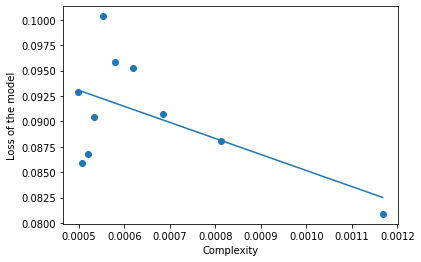

In [31]:
loss = []
var = []
for i in all_those_results:
  rmse, pove, l2 = i
  loss.append(rmse)
  var.append(l2)

nploss = np.array(loss)
npvar = np.array(var)

plt.scatter(npvar,nploss)
a, b = np.polyfit(npvar, nploss, 1)
plt.plot(npvar, a*npvar + b)
plt.xlabel("Complexity")
plt.ylabel("Loss of the model")
plt.show()